### This is my first (public) notebook of playing with pyspark

The goal of this notebook is to demonstrare a simple use case of:
1. using pyspark (python wrapper for spark) and access existing spark cluster
2. loading data into spark
3. accessing the data using the rdd-api, dataframe-api, and dataset-api
4. simple data exploration

I'll be using a sample of the gutenberg project - https://web.eecs.umich.edu/~lahiri/gutenberg_dataset.html

#### The settings I'm using here:
- spark: version 2.0.0
- python: 3.5

In [ ]:
#import urllib3 #ability to access data by url
import pyspark #python wrapper for spark
sc.stop()
sc = pyspark.SparkContext(appName="spark-project")

In [ ]:
# Here we demonstrare a usage of the RDD API to read a text file
rdd = sc.textFile("s3n://ak-public-sandbox/datasets/gutenberg_dataset/1/8/*/*/*")
rdd.count()
rdd.take(1) 

In [ ]:
#Let's see some fitering capabilities
rdd.filter(lambda line: "French" in line).count()

In [ ]:
#the good-old word count example
term_freq = rdd.flatMap(lambda line: line.split(" ")).map(lambda word: (word,1)).reduceByKey(lambda a,b: a + b)


In [ ]:
# some word-level stats
from pprint import pprint
print("total number of uniqu words %s" % term_freq.count())
stop_words = term_freq.takeOrdered(10,lambda a:-a[1])
rare_words = term_freq.takeOrdered(10,lambda a:a[1])
print("10 most frequent words: (word, freq):")
pprint(stop_words)
print("10 least frequent words: (word, freq)")
pprint(rare_words)


In [ ]:
# here we count how many cases the *frequency* appeared
# this way we can tell how many single terms we have, how may cases of exactly twice reapeating term we have etc
count_per_freq = term_freq.map(lambda tf: (tf[1],1)).reduceByKey(lambda a,b: a+b)
count_per_freq.values().collect() #number of unique frequencies

<IPython.core.display.Javascript object>


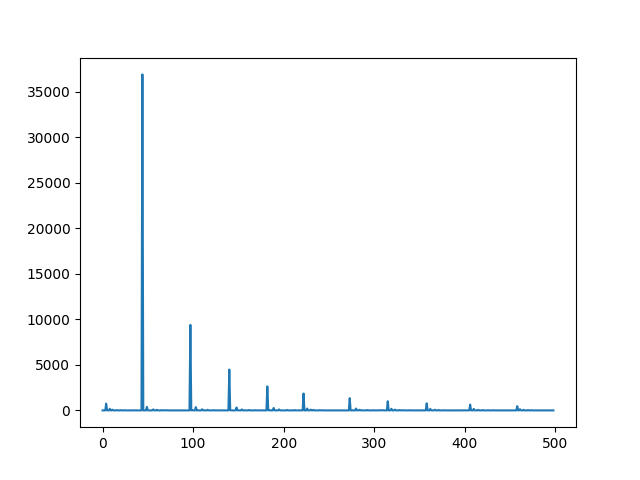

In [31]:
#let's try to plot the frequency data
%matplotlib notebook
import matplotlib.pyplot as plt
#num_bins = 50
#n, bins, patches = plt.hist(count_per_freq.take(50), num_bins, facecolor='green', log = True)
plt.plot(count_per_freq.values().collect())
plt.show()

In [ ]:
# Let's plot a histogram of the term frequency we have, using matplotlib package
import matplotlib.pyplot as plt
import numpy as np
num_bins = 100
n, bins, patches = plt.hist(terms_list.take(500), num_bins, normed=1, facecolor='green', alpha=0.5)
plt.show()

In [ ]:
rdd.filter(lambda line: "mankind" in line).saveAsTextFile("s3n://spark-course-data2/result/lesson_2-2")

In [ ]:
mankindLines = sc.textFile("s3n://spark-course-data2/result/lesson_2-2")
mankindLines.count()

In [ ]:
rdd = sc.wholeTextFiles("s3n://spark-course-data2/gutenberg_dataset/1/8/*/*/*")
rdd.count()
rdd.take(1)

In [ ]:
import boto3
session = boto3.Session() # leave out the profile_name argument if you haven't defined profiles
s3 = boto3.resource('s3')
bucket = s3.Bucket('spark-course-data2')
objs = bucket.objects.filter(Prefix='gutenberg_dataset/1')
for obj in objs:  
  print(obj.key)

In [ ]:
obj = s3.Object('spark-course-data2', 'gutenberg_dataset/1/9/9/1997/1997.txt')
content = obj.get()["Body"].read().decode("utf-8")
print(content[:100])

In [ ]:
http = urllib3.PoolManager()
r = http.request('GET', 'https://www.kaggle.com/c/titanic/download/train.csv')
r.status
#response = urllib3.urlopen('')
#html = response.read()